### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import seaborn as sns

### Load Data

In [7]:
churnData = pd.read_csv ('DATA_Customer-Churn.csv')

In [8]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Data Cleaning

In [9]:
churnData.columns = churnData.columns.str.lower()

In [10]:
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

#### Check for Null Data

In [11]:
churnData.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
churnData.onlinesecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

#### Convert TotalCharges in numeric

In [13]:
sum(churnData['totalcharges'] == " ")

11

In [14]:
churnData['totalcharges'].where(churnData['totalcharges'] != " ", 0, inplace=True) 

In [15]:
sum(churnData['totalcharges'] == " ")

0

In [16]:
churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges'])

In [17]:
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [18]:
mean_TotalCharges = np.mean(churnData['totalcharges'])

In [19]:
sum(churnData['totalcharges'] == 0)

11

In [20]:
#churnData['TotalCharges'] = list(map(lambda x: mean_TotalCharges if x[0] else x, churnData['TotalCharges']))

In [21]:
churnData['totalcharges'].where(churnData['totalcharges'] != 0, mean_TotalCharges, inplace=True) 

In [22]:
sum(churnData['totalcharges'] == 0)

0

#### Get dummy var

In [23]:
categorical = churnData.select_dtypes(include = object)
categorical

,gender,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


In [24]:
categorical_cols = pd.get_dummies(categorical.iloc[:,:-1], drop_first=True)
categorical_cols

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='totalcharges', ylabel='Count'>

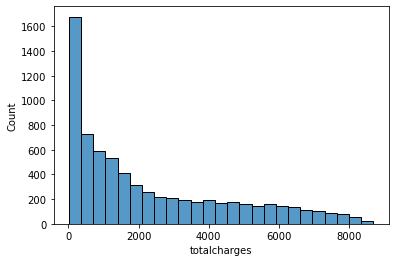

In [25]:
sns.histplot(churnData['totalcharges'])

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges

In [26]:
X = churnData.select_dtypes(np.number)

In [27]:
X

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [28]:
y = churnData.iloc[:,-1]

In [29]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: churn, Length: 7043, dtype: object

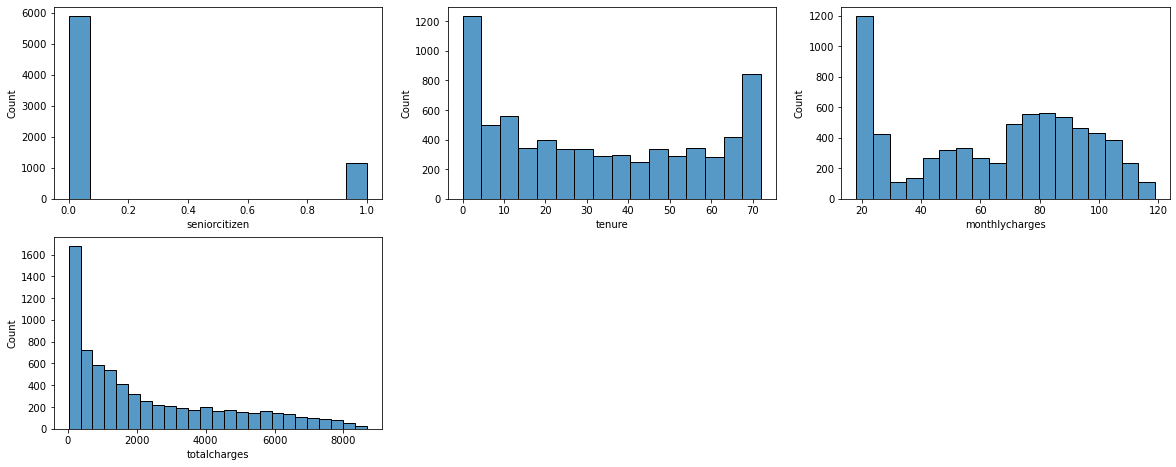

In [30]:
plt.figure(figsize=(20,12))
for i, column in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(X[column])

### Logistic regression

#### Cross Validation Log Reg

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LogisticRegression()

(7043, 4)
(7043,)


In [32]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.78793256, 0.78704525, 0.78172138, 0.78438332, 0.79751332])

In [33]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


In [34]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array(['No', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

#### Train Test Split

In [35]:
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

#### Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [38]:
#X_train_scaled

#### Run the model

,Error_metric,Train,Test
0,Accuracy,0.789670,0.801278
1,Precision,0.657227,0.670833
2,Recall,0.446583,0.444751


Confusion matrix for the train set
[[3776  351]
 [ 834  673]]


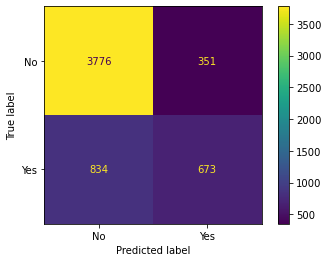



Confusion matrix for the test set
[[968  79]
 [201 161]]


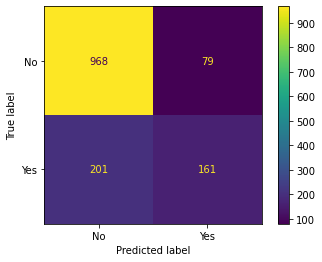

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
X_train

,seniorcitizen,tenure,monthlycharges,totalcharges
5181,0,72,90.80,6397.60
174,0,32,20.55,654.55
2964,0,24,58.35,1346.90
6925,0,15,18.80,294.95
465,0,70,40.05,2799.75
...,...,...,...,...
4973,1,13,93.80,1261.00
5858,0,61,19.45,1336.35
5599,0,9,94.85,890.60
489,0,1,74.35,74.35


In [42]:
#a = churnData['monthlycharges']
#b = churnData['churn'].apply(lambda x: 0 if x == 'No' else 1)

In [44]:
#sns.regplot(x= a, y= b, data= churnData, logistic=True, ci=None)

### KNN

#### cross validation knn

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
scores=cross_val_score(neigh, X_train, y_train, cv=5)
scores

array([0.74800355, 0.75332742, 0.74889086, 0.74001775, 0.78241563])

In [46]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.01


In [47]:
y_pred = cross_val_predict(neigh, X_test, y_test, cv=5)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

#### run the model

,Error_metric,Train,Test
0,Accuracy,0.857118,0.759404
1,Precision,0.778130,0.537954
2,Recall,0.651626,0.450276


Confusion matrix for the train set
[[3847  280]
 [ 525  982]]


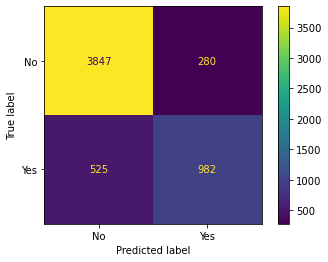



Confusion matrix for the test set
[[968  79]
 [201 161]]


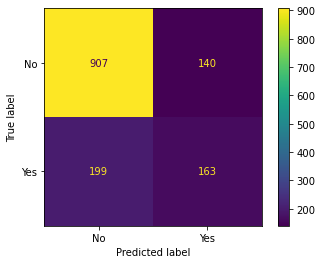

In [49]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn, pos_label="Yes")]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

### Decision Tree

In [50]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

#### cross validation decision tree

In [51]:
dt = DecisionTreeClassifier(max_depth=3)
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.78083407, 0.77373558, 0.78349601, 0.77462289, 0.79573712])

In [52]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.01


In [53]:
y_pred = cross_val_predict(dt, X_test, y_test, cv=5)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

#### run the model

,Error_metric,Train,Test
0,Accuracy,0.784523,0.783534
1,Precision,0.653725,0.639024
2,Recall,0.413404,0.361878


Confusion matrix for the train set
[[3797  884]
 [ 330  623]]


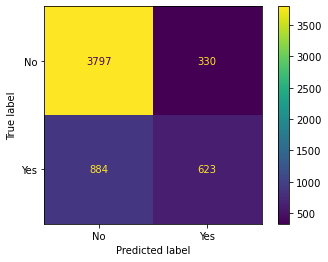



Confusion matrix for the test set
[[973 231]
 [ 74 131]]


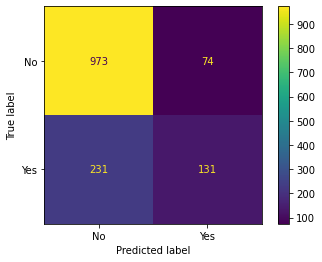

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

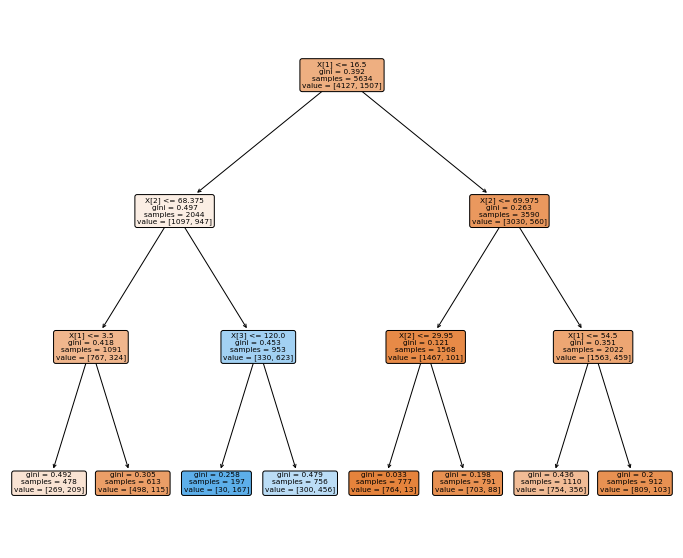

In [55]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,10))

plot_tree(dt,filled = True, rounded=True)
plt.show()

### Decision tree all features

In [56]:
X2 = pd.concat([X,categorical_cols],axis=1)

In [57]:
X2

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y_test

632      No
2899     No
2953    Yes
2033    Yes
2747     No
       ... 
3767     No
3093     No
3627     No
3709     No
3147     No
Name: churn, Length: 1409, dtype: object

#### cross validation decision tree

In [59]:
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20)
dt = DecisionTreeClassifier(max_depth=5)

(7043, 4)
(7043,)


In [60]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.77817214, 0.78172138, 0.78704525, 0.79236912, 0.79840142])

In [61]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


#### run the model

,Error_metric,Train,Test
0,Accuracy,0.798367,0.784244
1,Precision,0.696796,0.685590
2,Recall,0.411486,0.403599


Confusion matrix for the train set
[[3889  871]
 [ 265  609]]


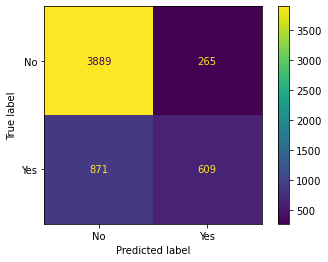



Confusion matrix for the test set
[[948 232]
 [ 72 157]]


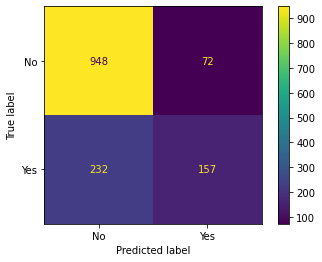

In [62]:
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

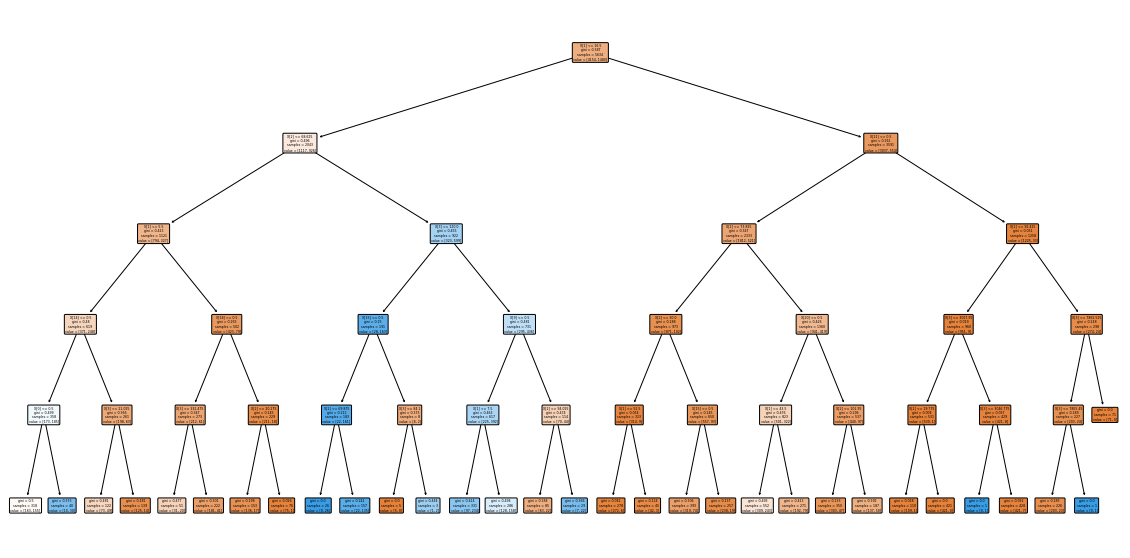

In [63]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
plot_tree(dt,filled = True, rounded=True)
plt.show()

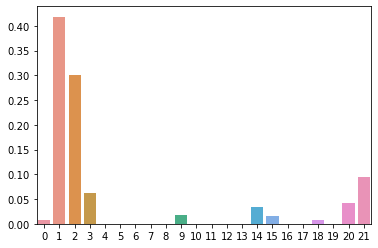

In [64]:
plot = sns.barplot(list(range(22)), dt.feature_importances_)

#### Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8541001064962727
0.7764371894960965


### Handling Imbalance

In [67]:
churnData.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

#### DOWNSAMPLING

In [68]:
churnData['churn'] = churnData['churn'].apply(lambda x: 0 if x == 'No' else 1)

In [69]:
churnData['churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [70]:
category_0 = churnData[churnData['churn'] == 0]
category_1 = churnData[churnData['churn'] == 1]

In [71]:
print(category_0.shape)
print(category_1.shape)

(5174, 16)
(1869, 16)


In [72]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [73]:
churn_down = pd.concat([category_0_down, category_1], axis=0)
churn_down

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
5192,Male,0,No,Yes,60,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.95,1189.90,0
716,Female,0,Yes,No,71,No,No,Yes,Yes,Yes,Yes,Yes,Two year,58.25,4145.90,0
4762,Male,1,No,No,34,Yes,No,No,No,No,No,No,Month-to-month,69.15,2275.10,0
3048,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,44.45,82.70,0
3786,Male,0,Yes,Yes,27,Yes,No,No,No,No,No,No,Month-to-month,75.75,1929.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,No,No,Yes,Yes,No,One year,59.80,727.80,1
7026,Female,0,No,No,9,Yes,No,No,No,No,No,No,Month-to-month,44.20,403.35,1
7032,Male,1,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,75.75,75.75,1
7034,Female,0,No,No,67,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,102.95,6886.25,1


In [74]:
#shuffling the data
churn_down = churn_down.sample(frac=1)
churn_down.churn.value_counts()

1    1869
0    1869
Name: churn, dtype: int64

##### logistic regression: only numerical values

In [75]:
X = churn_down.select_dtypes(np.number).iloc[:,:-1]
X

,seniorcitizen,tenure,monthlycharges,totalcharges
1603,0,15,64.65,994.55
5518,0,30,94.40,2838.70
2361,0,1,45.95,45.95
1867,0,3,83.75,247.25
3662,0,9,45.15,416.45
...,...,...,...,...
6899,0,1,45.10,45.10
889,0,63,100.55,6215.35
6515,0,29,25.10,712.85
910,1,10,72.85,688.65


In [76]:
y = churn_down.iloc[:,-1]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [78]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.729766,0.764706
1,Precision,0.719448,0.762712
2,Recall,0.741870,0.801527


Confusion matrix for the train set
[[1087  427]
 [ 381 1095]]


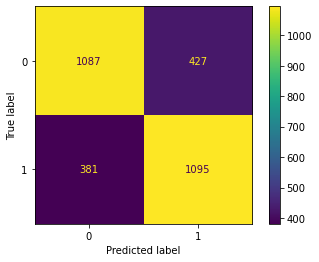



Confusion matrix for the test set
[[257  98]
 [ 78 315]]


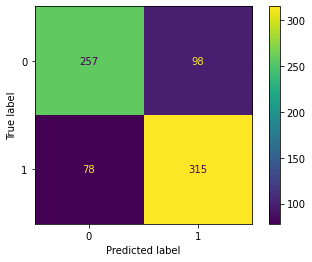

In [79]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

##### KNN

In [80]:
trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.829431,0.701872
1,Precision,0.831731,0.711443
2,Recall,0.820461,0.727735


Confusion matrix for the train set
[[1269  245]
 [ 265 1211]]


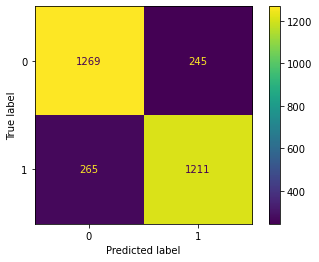



Confusion matrix for the test set
[[257  98]
 [ 78 315]]


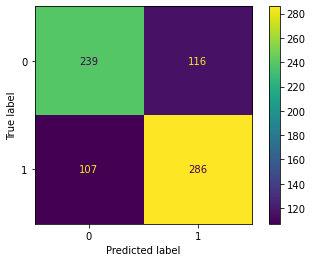

In [81]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

##### decision tree: only numerical

,Error_metric,Train,Test
0,Accuracy,0.730100,0.736631
1,Precision,0.683489,0.701646
2,Recall,0.844173,0.867684


Confusion matrix for the train set
[[ 937  230]
 [ 577 1246]]


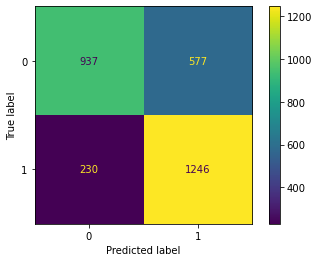



Confusion matrix for the test set
[[210  52]
 [145 341]]


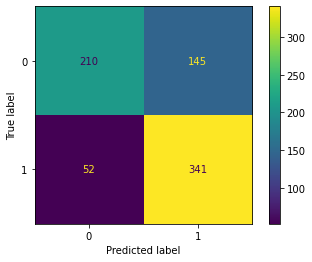

In [82]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

##### decision tree all

In [83]:
categorical = churn_down.select_dtypes(include = object)
categorical

,gender,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract
1603,Female,No,No,Yes,Yes,No,No,No,No,Yes,Month-to-month
5518,Male,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Month-to-month
2361,Female,No,Yes,Yes,No,No,No,No,No,No,Month-to-month
1867,Female,No,No,Yes,No,Yes,No,No,Yes,No,Month-to-month
3662,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
6899,Male,No,No,Yes,No,No,No,No,No,No,Month-to-month
889,Female,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month
6515,Female,No,No,No,No,No,No,No,No,No,Month-to-month
910,Male,No,No,Yes,No,Yes,No,No,No,No,Month-to-month


In [84]:
categorical_cols = pd.get_dummies(categorical.iloc[:,:], drop_first=True)
categorical_cols

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
1603,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5518,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2361,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1867,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3662,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0
6515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
910,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [85]:
X = churn_down.select_dtypes(np.number).iloc[:,:-1]
X

,seniorcitizen,tenure,monthlycharges,totalcharges
1603,0,15,64.65,994.55
5518,0,30,94.40,2838.70
2361,0,1,45.95,45.95
1867,0,3,83.75,247.25
3662,0,9,45.15,416.45
...,...,...,...,...
6899,0,1,45.10,45.10
889,0,63,100.55,6215.35
6515,0,29,25.10,712.85
910,1,10,72.85,688.65


In [86]:
X3 = pd.concat([X,categorical_cols],axis=1)

In [87]:
X3

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
1603,0,15,64.65,994.55,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
5518,0,30,94.40,2838.70,1,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2361,0,1,45.95,45.95,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1867,0,3,83.75,247.25,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3662,0,9,45.15,416.45,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,0,1,45.10,45.10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,63,100.55,6215.35,0,1,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0
6515,0,29,25.10,712.85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
910,1,10,72.85,688.65,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.20)
dt = DecisionTreeClassifier(max_depth=5)

,Error_metric,Train,Test
0,Accuracy,0.755518,0.744652
1,Precision,0.729616,0.710956
2,Recall,0.812959,0.819892


Confusion matrix for the train set
[[1042  280]
 [ 451 1217]]


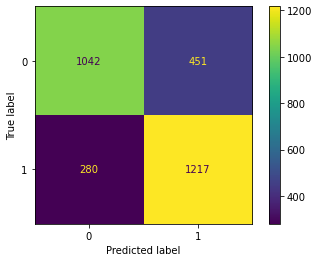



Confusion matrix for the test set
[[252  67]
 [124 305]]


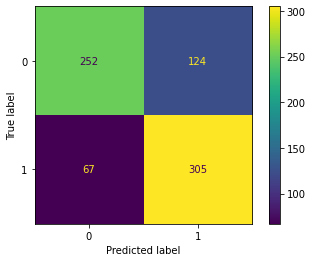

In [89]:
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

###### plot

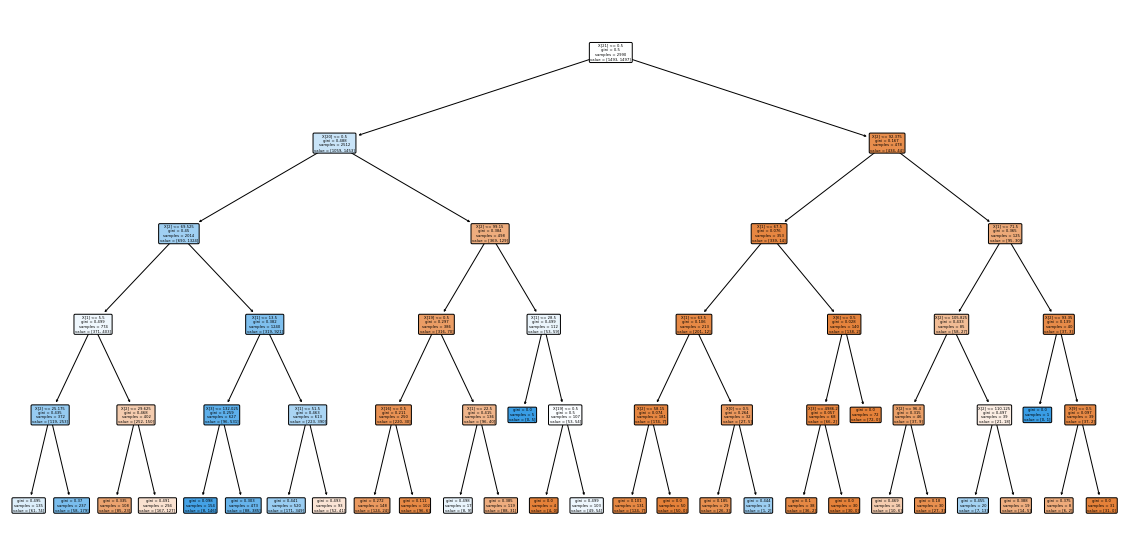

In [90]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
plot_tree(dt,filled = True, rounded=True)
plt.show()

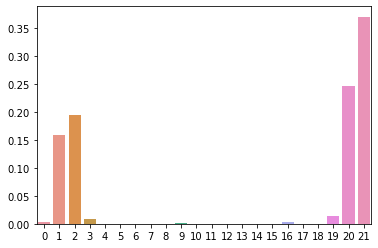

In [91]:
plot = sns.barplot(list(range(22)), dt.feature_importances_)

##### Random Forest (BEST)

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.882943143812709
0.7874331550802139


#### UPSAMPLING

In [98]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 16)


In [99]:
print(category_1_up.shape)
print(category_0.shape)

(5174, 16)
(5174, 16)


In [100]:
churn_up = pd.concat([category_1_up, category_0], axis=0)
churn_up

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
910,Male,1,No,No,10,Yes,No,Yes,No,No,No,No,Month-to-month,72.85,688.65,1
182,Male,0,No,No,8,Yes,No,No,No,No,No,Yes,Month-to-month,84.50,662.65,1
1232,Male,0,Yes,Yes,34,Yes,No,No,No,No,Yes,No,Month-to-month,78.30,2564.30,1
4184,Male,1,Yes,No,5,Yes,No,No,Yes,No,No,No,Month-to-month,79.90,343.95,1
4180,Female,1,No,No,2,No,No,No,No,No,No,No,Month-to-month,24.35,41.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,21.15,1419.40,0
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0


In [101]:
#shuffling the data
churn_up = churn_up.sample(frac=1)
churn_up.churn.value_counts()

0    5174
1    5174
Name: churn, dtype: int64

##### logistic regression: only numerical data

In [102]:
X = churn_up.select_dtypes(np.number).iloc[:,:-1]
X

,seniorcitizen,tenure,monthlycharges,totalcharges
3783,0,66,105.20,6936.85
2909,0,43,55.45,2444.25
1795,0,19,89.65,1761.05
3272,0,1,81.70,81.70
3917,1,1,69.10,69.10
...,...,...,...,...
2642,0,47,85.30,4045.65
5099,0,11,20.10,221.35
780,0,71,73.35,5154.50
4946,0,4,81.00,340.85


In [103]:
y = churn_up.iloc[:,-1]
y

3783    0
2909    0
1795    1
3272    1
3917    1
       ..
2642    1
5099    1
780     0
4946    1
5233    1
Name: churn, Length: 10348, dtype: int64

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [105]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.741483,0.742512
1,Precision,0.727877,0.734675
2,Recall,0.769138,0.767686


Confusion matrix for the train set
[[2963 1187]
 [ 953 3175]]


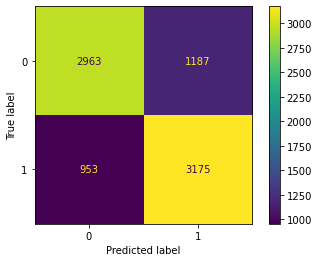



Confusion matrix for the test set
[[734 290]
 [243 803]]


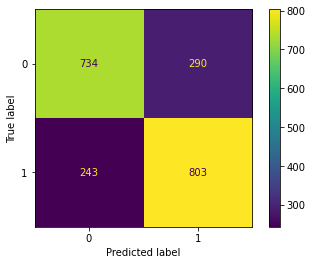

In [106]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

##### KNN

In [107]:
trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.897560,0.786957
1,Precision,0.850427,0.748971
2,Recall,0.964147,0.869981


Confusion matrix for the train set
[[3450  700]
 [ 148 3980]]


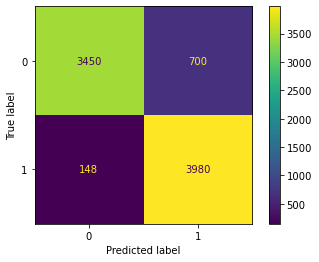



Confusion matrix for the test set
[[734 290]
 [243 803]]


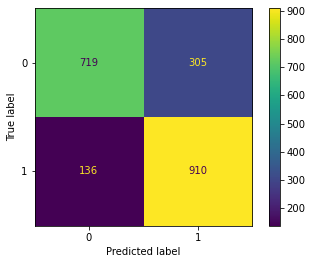

In [108]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

##### decision tree: only numerical

,Error_metric,Train,Test
0,Accuracy,0.741967,0.733816
1,Precision,0.725850,0.728955
2,Recall,0.775436,0.753346


Confusion matrix for the train set
[[2941  927]
 [1209 3201]]


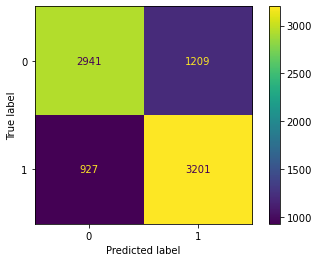



Confusion matrix for the test set
[[731 258]
 [293 788]]


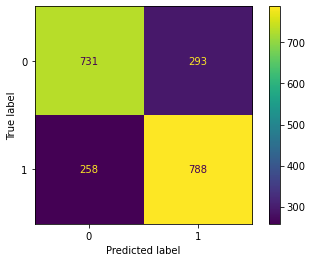

In [109]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

##### decision tree all

In [110]:
categorical = churn_up.select_dtypes(include = object)
categorical

,gender,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract
3783,Female,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month
2909,Female,No,No,Yes,No,Yes,No,Yes,No,No,One year
1795,Female,Yes,No,Yes,No,No,Yes,No,No,Yes,Month-to-month
3272,Male,No,No,Yes,Yes,No,No,No,No,No,Month-to-month
3917,Male,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
2642,Female,Yes,No,Yes,No,No,Yes,No,No,Yes,Month-to-month
5099,Female,No,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month
780,Male,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Two year
4946,Male,No,No,Yes,No,No,No,No,Yes,No,Month-to-month


In [111]:
categorical_cols = pd.get_dummies(categorical.iloc[:,:], drop_first=True)
categorical_cols

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
3783,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2909,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1795,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3272,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3917,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5099,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0
780,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1
4946,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [112]:
X = churn_up.select_dtypes(np.number).iloc[:,:-1]
X

,seniorcitizen,tenure,monthlycharges,totalcharges
3783,0,66,105.20,6936.85
2909,0,43,55.45,2444.25
1795,0,19,89.65,1761.05
3272,0,1,81.70,81.70
3917,1,1,69.10,69.10
...,...,...,...,...
2642,0,47,85.30,4045.65
5099,0,11,20.10,221.35
780,0,71,73.35,5154.50
4946,0,4,81.00,340.85


In [113]:
X4 = pd.concat([X,categorical_cols],axis=1)
X4

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
3783,0,66,105.20,6936.85,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2909,0,43,55.45,2444.25,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1795,0,19,89.65,1761.05,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3272,0,1,81.70,81.70,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3917,1,1,69.10,69.10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,0,47,85.30,4045.65,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5099,0,11,20.10,221.35,0,0,1,1,1,0,...,1,0,1,0,1,0,1,0,0,0
780,0,71,73.35,5154.50,1,1,1,1,0,0,...,0,0,0,1,0,1,0,1,0,1
4946,0,4,81.00,340.85,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.20)
dt = DecisionTreeClassifier(max_depth=5)

,Error_metric,Train,Test
0,Accuracy,0.763107,0.761836
1,Precision,0.746129,0.748663
2,Recall,0.794810,0.799239


Confusion matrix for the train set
[[3040  846]
 [1115 3277]]


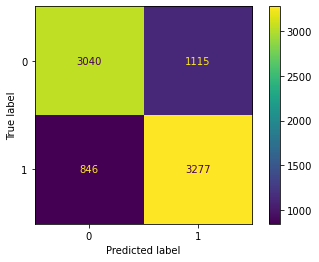



Confusion matrix for the test set
[[737 211]
 [282 840]]


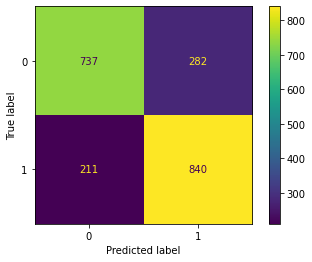

In [115]:
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

###### plot

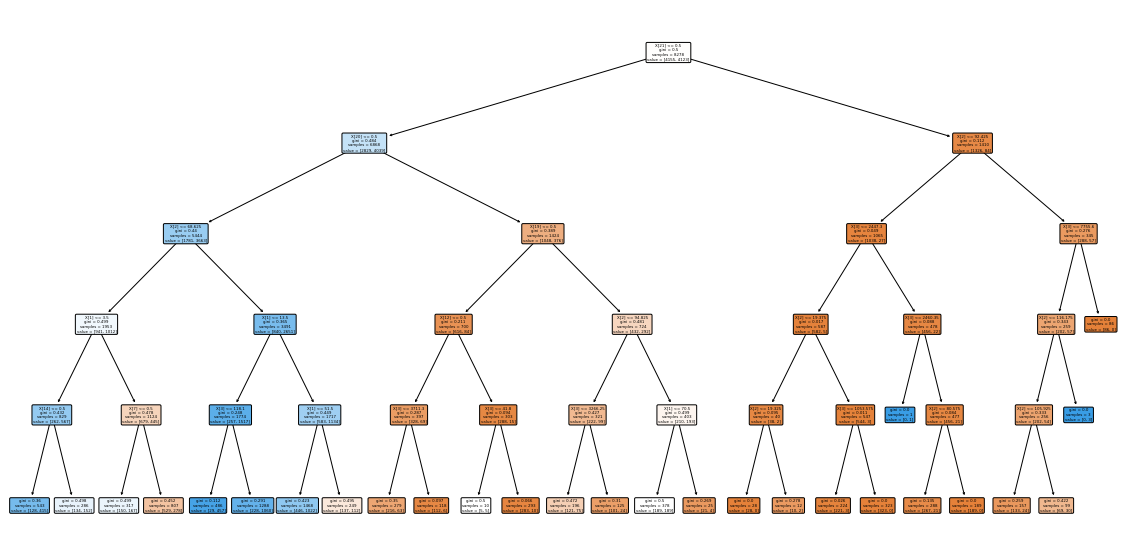

In [116]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
plot_tree(dt,filled = True, rounded=True)
plt.show()

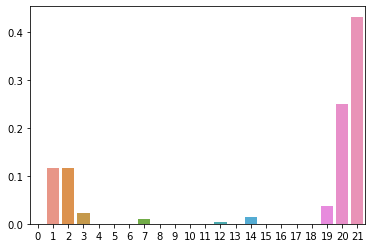

In [117]:
plot = sns.barplot(list(range(22)), dt.feature_importances_)

##### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8758154143512926
0.840096618357488


### Implementing hyperparameter tuning

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'max_depth': [5, 8, 10],
    'bootstrap': [True, False],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt', 'log2']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)

In [122]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [123]:
#grid_search.fit(X_train,y_train)

In [125]:
#grid_search.best_params_

In [126]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=500, min_samples_leaf =1, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8753322058468229
0.8410628019323672


In [127]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",
                             n_estimators=500, min_samples_leaf =1, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.8303917015696103


In [128]:
clf.fit( X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=500,
                       random_state=0)

In [130]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [131]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
1,tenure,0.190349
3,totalcharges,0.159461
2,monthlycharges,0.144089
21,contract_Two year,0.132550
20,contract_One year,0.053706
9,onlinesecurity_Yes,0.039490
15,techsupport_Yes,0.033103
8,onlinesecurity_No internet service,0.023287
16,streamingtv_No internet service,0.023125
10,onlinebackup_No internet service,0.022448


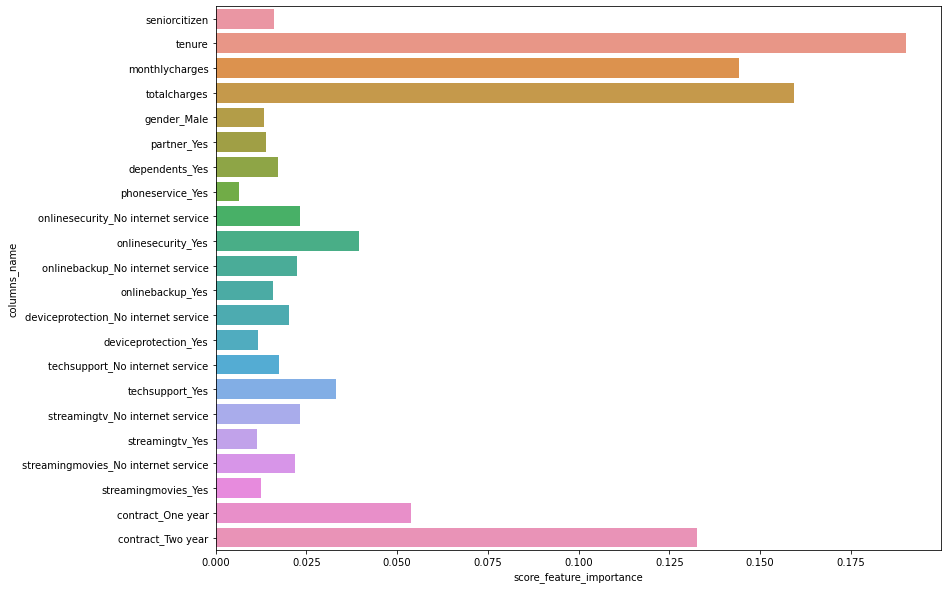

In [150]:
plot = sns.barplot(x=df.score_feature_importance, y=df.columns_name)
plt.gcf().set_size_inches(13,10)

In [ ]:
#it seems that tenure, total_charge, monthly_carges, 
#and two_years_contracts are the most important features predicting a contract churn